### Importando os dados

In [1]:
import numpy as np
import pandas as pd
base = pd.read_csv('sample_train_dataset_tch_pred.csv')

In [2]:
base.head()

,chavesig,tch,ndvi_a_p05,ncorte,areaesti,linhas_falha_km,chuva_dia_p04,chuva_dia_p12,bal_hidrico_p12,bal_hidrico_p04,espacamento_m
0,94478001,90.160088,0.680882,2.000000,4.56,0.0,1.161527,1.280645,-2.127157,-2.780566,1.400000
1,90709507,94.617647,0.707574,5.069624,103.70,0.0,8.496693,1.226924,-1.153300,4.153933,1.000000
2,36217378,63.242697,0.713584,6.000000,8.90,0.0,0.980281,7.037144,2.018537,-1.465973,1.500000
3,78399001,69.896337,0.722181,3.818791,76.10,0.0,2.672268,0.211750,-3.778909,-1.211574,1.400000
4,38177001,49.330938,0.740127,3.346908,6.63,0.0,5.116088,5.005593,0.827118,2.353678,1.465309


In [3]:
base.columns

Index(['chavesig', 'tch', 'ndvi_a_p05', 'ncorte', 'areaesti',
       'linhas_falha_km', 'chuva_dia_p04', 'chuva_dia_p12', 'bal_hidrico_p12',
       'bal_hidrico_p04', 'espacamento_m'],
      dtype='object')

In [4]:
colunas = ['tch', 'ndvi_a_p05', 'ncorte', 'areaesti', 'chuva_dia_p04','chuva_dia_p12',
       'bal_hidrico_p12', 'bal_hidrico_p04','espacamento_m']

In [5]:
base = pd.read_csv('sample_train_dataset_tch_pred.csv', usecols = colunas)

### Identificando as variaveis indepedentes (x1,x2,xn)

In [6]:
colunas_x =  ['ndvi_a_p05', 'ncorte', 'areaesti', 'chuva_dia_p04','chuva_dia_p12',
       'bal_hidrico_p12', 'bal_hidrico_p04','espacamento_m']

### Identificando a variavel depedente (y)

In [7]:
colunas_y = ['tch']

### Normalizando os dados manualmente

In [23]:
#Normalizando manualmente em y

tch_y = base['tch']

#Função para normalizar os dados
normalized_y = map(lambda x: (x - tch_y.min())/( tch_y.max()-tch_y.min()), tch_y)
#normalized_y = pd.Series(normalized_y) #Passando para Series para desnormalizar
#normalized_y.head() #Visualização dos dados normalizados


#Função para desnormalizar os dados
#unnormalized_y = map(lambda y: tch_y.min() + (y*(tch_y.max() - tch_y.min()) ), normalized_y)
#unnormalized_y = pd.Series(unnormalized_y) #Passando para Series

In [11]:
# Normalizando manualmente em x

tch_x = base.drop('tch', axis =1)
df = pd.DataFrame(columns = colunas_x)


def normalized_x():
    
    for cont in range(len(tch_x.columns)):
        df.iloc[:,cont] = list(map(lambda x: (x - tch_x.min()[cont])/( tch_x.max()[cont]-tch_x.min()[cont]), tch_x.iloc[:,cont]))
        print(df.iloc[:,0])
normalized_x()

### Normalizando os dados x e y

In [19]:
from sklearn.preprocessing import MinMaxScaler
x_scaler = MinMaxScaler()
base[colunas_x] = x_scaler.fit_transform(base[colunas_x])

In [21]:
y_scaler = MinMaxScaler()
base[colunas_y] = y_scaler.fit_transform(base[colunas_y])

### Armazenando as variaveis indepedentes(x)

In [24]:
x = base.drop('tch', axis = 1)

### Armazenando a variavel depedente(y)

In [25]:
y = base['tch']

### Função para separar o dataset em 70% para train e 30% teste

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state = 42)

### Criando função regressão linear

#### Executando treinamento

In [27]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression().fit(x_train,y_train)

#### Validando manualmente o resultado

In [28]:
# B0
interc = regressor.intercept_
interc

0.3782885700585136

In [31]:
# B(nº)
coef = regressor.coef_
coef.reshape(-1,1)
#coef.shape

array([[ 1.77920466],
       [-0.21316789],
       [ 0.09779087],
       [ 0.06270696],
       [-0.22636077],
       [ 0.15950572],
       [-0.01740596],
       [ 0.02789494]])

### Predição manual

In [35]:
# Função para predição manual
def pred_manual():
    predict_manual = []
    for c in range(len(x_test)):
        val = regressor.intercept_
        for t in range(len(x_test.columns)):
            val = (x_test.iloc[c][t] * coef[t]) + val
        predict_manual.append(val)
    predict_manual = np.asanyarray(predict_manual)
    predict_manual = predict_manual.reshape(-1,1)
    return predict_manual

In [36]:
pr_manual = pred_manual()
pr_manual = y_scaler.inverse_transform(pr_manual)
print(pr_manual)

[[75.52474604]
 [78.06187937]
 [76.85405768]
 ...
 [74.54892871]
 [73.81222366]
 [76.04377758]]


### Fazendo predição através do modelo

In [37]:
pred = regressor.predict(x_test)

### Formatando os dados de predição

In [38]:
pred = pred.reshape(-1,1)
pr = y_scaler.inverse_transform(pred)

### Formatando os dados de y_teste

In [39]:
y_teste = y_test.values.reshape(-1,1)
y_teste = y_scaler.inverse_transform(y_teste)

### Importando as bibliotecas para os erros MAE e MSE

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


### Mean Absolute Error (MAE)

In [41]:
mae = mean_absolute_error(y_teste, pr)
mae

16.395652033289952

### Mean Squared Error (MSE)

In [42]:
mse = mean_squared_error(y_teste, pr)
mse

404.0661063614837

### Plotando o gráfico

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

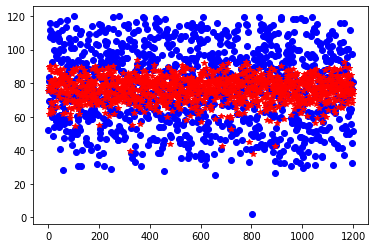

In [45]:
plt.plot(y_teste, 'o', color ='blue')
plt.plot(pr, '*', color = 'red')
plt.show()